# Statistical and Machine Learning 

## Individual Project

### Import Libraries

In [165]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.neural_network import MLPClassifier

### Data Preprocessing

In [101]:
bank = pd.read_csv("bank_mkt_train.csv")

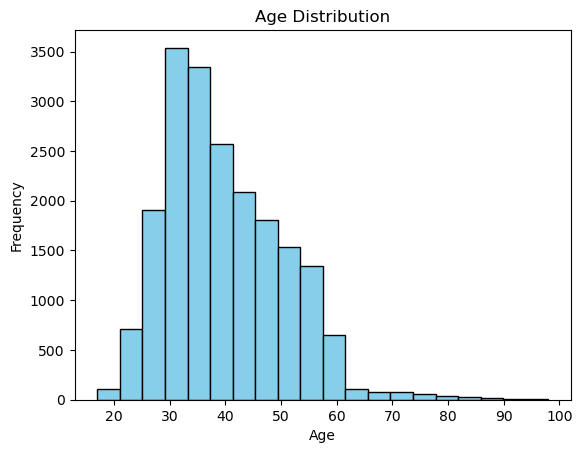

In [102]:
plt.hist(bank['age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


In [104]:
# Create descriptive age groups
bins = [0, 30, 40, 50, 60, float('inf')]
labels = ['Early-adult', 'Midage-adult', 'Adult', 'late_middle_aged', 'senior']
bank['age_category'] = pd.cut(bank['age'], bins=bins, labels=labels)

# Perform one-hot encoding on the "age_category" column
one_hot_encoded = pd.get_dummies(bank['age_category'], prefix='age')

# Convert boolean values to integers (0 or 1)
one_hot_encoded = one_hot_encoded.astype(int)

# Concatenate the original DataFrame with the one-hot encoded DataFrame
bank = pd.concat([bank, one_hot_encoded], axis=1)

# Drop the original "age_category" column
bank.drop('age_category', axis=1, inplace=True)

# Check the first few rows of the resulting DataFrame
bank.head()


,client_id,age,job,marital,education,default,housing,loan,contact,month,...,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribe,age_Early-adult,age_Midage-adult,age_Adult,age_late_middle_aged,age_senior
0,29925,42,management,married,basic.9y,no,no,no,cellular,jul,...,93.918,-42.7,4.968,5228.1,0,0,0,1,0,0
1,37529,35,unemployed,married,university.degree,no,yes,no,telephone,jun,...,94.465,-41.8,4.960,5228.1,0,0,1,0,0,0
2,2757,44,technician,married,basic.9y,no,yes,yes,cellular,may,...,92.893,-46.2,1.264,5099.1,0,0,0,1,0,0
3,9642,45,services,married,high.school,no,yes,no,cellular,apr,...,93.075,-47.1,1.453,5099.1,0,0,0,1,0,0
4,14183,45,unknown,married,unknown,unknown,unknown,unknown,telephone,may,...,93.994,-36.4,4.859,5191.0,0,0,0,1,0,0


In [106]:
job_counts = bank['job'].value_counts()

# Print the count of each job type
print(job_counts)


job
admin.           5021
blue-collar      4524
technician       3303
services         1927
management       1429
retired           834
entrepreneur      720
self-employed     700
housemaid         529
unemployed        470
student           398
unknown           145
Name: count, dtype: int64


In [107]:
# Define a function to categorize job profiles
def categorize_job(job):
    if job in ["admin.", "management"]:
        return "white_collar_jobs"
    elif job in ["blue-collar", "technician", "housemaid"]:
        return "blue_collar_jobs"
    elif job == "unknown":
        return "unknown_jobs"
    else:
        return "other_jobs"

# Apply the function to create a new column 'job_group'
bank['job_group'] = bank['job'].apply(categorize_job)

# Perform one-hot encoding on the 'job_group' column
one_hot_encoded = pd.get_dummies(bank['job_group'])

# Convert the resulting one-hot encoded values to 0 or 1
one_hot_encoded = one_hot_encoded.astype(int)

# Concatenate the original DataFrame with the one-hot encoded DataFrame
bank = pd.concat([bank, one_hot_encoded], axis=1)

# Drop the 'job_group' column
bank.drop('job_group', axis=1, inplace=True)

# Print the first few rows of the resulting DataFrame
bank.head()

,client_id,age,job,marital,education,default,housing,loan,contact,month,...,subscribe,age_Early-adult,age_Midage-adult,age_Adult,age_late_middle_aged,age_senior,blue_collar_jobs,other_jobs,unknown_jobs,white_collar_jobs
0,29925,42,management,married,basic.9y,no,no,no,cellular,jul,...,0,0,0,1,0,0,0,0,0,1
1,37529,35,unemployed,married,university.degree,no,yes,no,telephone,jun,...,0,0,1,0,0,0,0,1,0,0
2,2757,44,technician,married,basic.9y,no,yes,yes,cellular,may,...,0,0,0,1,0,0,1,0,0,0
3,9642,45,services,married,high.school,no,yes,no,cellular,apr,...,0,0,0,1,0,0,0,1,0,0
4,14183,45,unknown,married,unknown,unknown,unknown,unknown,telephone,may,...,0,0,0,1,0,0,0,0,1,0


In [109]:
marital_counts = bank['marital'].value_counts()

# Print the count of each marital type
print(marital_counts)


marital
married     12047
single       5626
divorced     2287
unknown        40
Name: count, dtype: int64


In [110]:
# Perform one-hot encoding on the 'marital' column
one_hot_encoded = pd.get_dummies(bank['marital'])

# Convert the resulting one-hot encoded values to 0 or 1
one_hot_encoded = one_hot_encoded.astype(int)

# Append '_marital' to the column names
one_hot_encoded.columns = [col + '_marital' for col in one_hot_encoded.columns]

# Concatenate the original DataFrame with the one-hot encoded DataFrame
bank = pd.concat([bank, one_hot_encoded], axis=1)

# Drop the original 'marital' column
bank.drop('marital', axis=1, inplace=True)

# Print the first few rows of the resulting DataFrame
bank.head()

,client_id,age,job,education,default,housing,loan,contact,month,day_of_week,...,age_late_middle_aged,age_senior,blue_collar_jobs,other_jobs,unknown_jobs,white_collar_jobs,divorced_marital,married_marital,single_marital,unknown_marital
0,29925,42,management,basic.9y,no,no,no,cellular,jul,thu,...,0,0,0,0,0,1,0,1,0,0
1,37529,35,unemployed,university.degree,no,yes,no,telephone,jun,mon,...,0,0,0,1,0,0,0,1,0,0
2,2757,44,technician,basic.9y,no,yes,yes,cellular,may,mon,...,0,0,1,0,0,0,0,1,0,0
3,9642,45,services,high.school,no,yes,no,cellular,apr,tue,...,0,0,0,1,0,0,0,1,0,0
4,14183,45,unknown,unknown,unknown,unknown,unknown,telephone,may,wed,...,0,0,0,0,1,0,0,1,0,0


In [111]:
# Define a function to categorize education levels
def categorize_education(education):
    education_mapping = {
        "basic.4y": "basic_education",
        "basic.6y": "basic_education",
        "basic.9y": "basic_education",
        "illiterate": "basic_education",
        "high.school": "secondary_education",
        "university.degree": "tertiary_education",
        "professional.course": "tertiary_education",
        "unknown_education": "unknown"
    }
    return education_mapping.get(education, "other_education")

# Apply the function to each education level
bank['education_grouped'] = bank['education'].apply(categorize_education)

# Perform one-hot encoding directly on the 'education_grouped' column
one_hot_encoded = pd.get_dummies(bank['education_grouped'])

# Convert the resulting one-hot encoded values to integers (0 or 1)
one_hot_encoded = one_hot_encoded.astype(int)

# Concatenate the original DataFrame with the one-hot encoded DataFrame
bank = pd.concat([bank, one_hot_encoded], axis=1)

# Drop the original 'education_grouped' column
bank.drop(columns=['education_grouped'], inplace=True)

# Print the first few rows of the resulting DataFrame
bank.head()


,client_id,age,job,education,default,housing,loan,contact,month,day_of_week,...,unknown_jobs,white_collar_jobs,divorced_marital,married_marital,single_marital,unknown_marital,basic_education,other_education,secondary_education,tertiary_education
0,29925,42,management,basic.9y,no,no,no,cellular,jul,thu,...,0,1,0,1,0,0,1,0,0,0
1,37529,35,unemployed,university.degree,no,yes,no,telephone,jun,mon,...,0,0,0,1,0,0,0,0,0,1
2,2757,44,technician,basic.9y,no,yes,yes,cellular,may,mon,...,0,0,0,1,0,0,1,0,0,0
3,9642,45,services,high.school,no,yes,no,cellular,apr,tue,...,0,0,0,1,0,0,0,0,1,0
4,14183,45,unknown,unknown,unknown,unknown,unknown,telephone,may,wed,...,1,0,0,1,0,0,0,1,0,0


In [112]:
# Perform one-hot encoding on the 'default' column
one_hot_encoded = pd.get_dummies(bank['default'], prefix='default', dtype=int)

# Concatenate the original DataFrame with the one-hot encoded DataFrame
bank = pd.concat([bank, one_hot_encoded], axis=1)

# View the first few rows of the resulting DataFrame
bank.head()


,client_id,age,job,education,default,housing,loan,contact,month,day_of_week,...,married_marital,single_marital,unknown_marital,basic_education,other_education,secondary_education,tertiary_education,default_no,default_unknown,default_yes
0,29925,42,management,basic.9y,no,no,no,cellular,jul,thu,...,1,0,0,1,0,0,0,1,0,0
1,37529,35,unemployed,university.degree,no,yes,no,telephone,jun,mon,...,1,0,0,0,0,0,1,1,0,0
2,2757,44,technician,basic.9y,no,yes,yes,cellular,may,mon,...,1,0,0,1,0,0,0,1,0,0
3,9642,45,services,high.school,no,yes,no,cellular,apr,tue,...,1,0,0,0,0,1,0,1,0,0
4,14183,45,unknown,unknown,unknown,unknown,unknown,telephone,may,wed,...,1,0,0,0,1,0,0,0,1,0


In [113]:
# Perform one-hot encoding on the 'housing' column
one_hot_encoded = pd.get_dummies(bank['housing'], prefix='housing', dtype=int)

# Concatenate the original DataFrame with the one-hot encoded DataFrame
bank = pd.concat([bank, one_hot_encoded], axis=1)

# View the first few rows of the resulting DataFrame
bank.head()


,client_id,age,job,education,default,housing,loan,contact,month,day_of_week,...,basic_education,other_education,secondary_education,tertiary_education,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes
0,29925,42,management,basic.9y,no,no,no,cellular,jul,thu,...,1,0,0,0,1,0,0,1,0,0
1,37529,35,unemployed,university.degree,no,yes,no,telephone,jun,mon,...,0,0,0,1,1,0,0,0,0,1
2,2757,44,technician,basic.9y,no,yes,yes,cellular,may,mon,...,1,0,0,0,1,0,0,0,0,1
3,9642,45,services,high.school,no,yes,no,cellular,apr,tue,...,0,0,1,0,1,0,0,0,0,1
4,14183,45,unknown,unknown,unknown,unknown,unknown,telephone,may,wed,...,0,1,0,0,0,1,0,0,1,0


In [114]:
# Create dummy variables for the 'loan' column
dummy_loan = pd.get_dummies(bank['loan'], prefix='loan', dtype=int)

# Concatenate the original DataFrame with the dummy variables
bank = pd.concat([bank, dummy_loan], axis=1)

# View the first few rows of the resulting DataFrame
bank.head()


,client_id,age,job,education,default,housing,loan,contact,month,day_of_week,...,tertiary_education,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes
0,29925,42,management,basic.9y,no,no,no,cellular,jul,thu,...,0,1,0,0,1,0,0,1,0,0
1,37529,35,unemployed,university.degree,no,yes,no,telephone,jun,mon,...,1,1,0,0,0,0,1,1,0,0
2,2757,44,technician,basic.9y,no,yes,yes,cellular,may,mon,...,0,1,0,0,0,0,1,0,0,1
3,9642,45,services,high.school,no,yes,no,cellular,apr,tue,...,0,1,0,0,0,0,1,1,0,0
4,14183,45,unknown,unknown,unknown,unknown,unknown,telephone,may,wed,...,0,0,1,0,0,1,0,0,1,0


In [115]:
# Create dummy variables for the 'contact' column
dummy_contact = pd.get_dummies(bank['contact'], prefix='contact', dtype=int)

# Concatenate the original DataFrame with the dummy variables
bank = pd.concat([bank, dummy_contact], axis=1)

# View the first few rows of the resulting DataFrame
bank.head()

,client_id,age,job,education,default,housing,loan,contact,month,day_of_week,...,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone
0,29925,42,management,basic.9y,no,no,no,cellular,jul,thu,...,0,0,1,0,0,1,0,0,1,0
1,37529,35,unemployed,university.degree,no,yes,no,telephone,jun,mon,...,0,0,0,0,1,1,0,0,0,1
2,2757,44,technician,basic.9y,no,yes,yes,cellular,may,mon,...,0,0,0,0,1,0,0,1,1,0
3,9642,45,services,high.school,no,yes,no,cellular,apr,tue,...,0,0,0,0,1,1,0,0,1,0
4,14183,45,unknown,unknown,unknown,unknown,unknown,telephone,may,wed,...,1,0,0,1,0,0,1,0,0,1


In [116]:
# Define a function to map months to quarters
def map_month_to_season(month):
    if month in ["may", "jul", "aug","jun"]:
        return "peak_season"
    elif month in ["dec", "sep"]:
        return "off_season"
    elif month in ["mar", "apr", "oct","nov"]:
        return "moderate"
    else:
        return "unknown"

# Apply the function to each month
bank['season'] = bank['month'].apply(map_month_to_season)

# Summarize the counts for each season_counts
season_counts = bank['season'].value_counts()

# Display the result
print(season_counts)

season
peak_season    15787
moderate        3828
off_season       385
Name: count, dtype: int64


In [117]:
one_hot_encoded = pd.get_dummies(bank['season'], prefix='season', dtype=int)

# Concatenate the original DataFrame with the one-hot encoded DataFrame
bank = pd.concat([bank, one_hot_encoded], axis=1)

bank.drop('season', axis=1, inplace=True)

# View the first few rows of the resulting DataFrame
bank.head()

,client_id,age,job,education,default,housing,loan,contact,month,day_of_week,...,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,season_moderate,season_off_season,season_peak_season
0,29925,42,management,basic.9y,no,no,no,cellular,jul,thu,...,0,0,1,0,0,1,0,0,0,1
1,37529,35,unemployed,university.degree,no,yes,no,telephone,jun,mon,...,0,1,1,0,0,0,1,0,0,1
2,2757,44,technician,basic.9y,no,yes,yes,cellular,may,mon,...,0,1,0,0,1,1,0,0,0,1
3,9642,45,services,high.school,no,yes,no,cellular,apr,tue,...,0,1,1,0,0,1,0,1,0,0
4,14183,45,unknown,unknown,unknown,unknown,unknown,telephone,may,wed,...,1,0,0,1,0,0,1,0,0,1


In [118]:
# Perform one-hot encoding on the 'day_of_week' column
one_hot_encoded = pd.get_dummies(bank['day_of_week'], prefix='day', dtype=int)

# Concatenate the original DataFrame with the one-hot encoded DataFrame
bank = pd.concat([bank, one_hot_encoded], axis=1)

# Drop the original 'day_of_week' column
bank.drop('day_of_week', axis=1, inplace=True)

# View the first few rows of the resulting DataFrame
bank.head()


,client_id,age,job,education,default,housing,loan,contact,month,campaign,...,contact_cellular,contact_telephone,season_moderate,season_off_season,season_peak_season,day_fri,day_mon,day_thu,day_tue,day_wed
0,29925,42,management,basic.9y,no,no,no,cellular,jul,1,...,1,0,0,0,1,0,0,1,0,0
1,37529,35,unemployed,university.degree,no,yes,no,telephone,jun,4,...,0,1,0,0,1,0,1,0,0,0
2,2757,44,technician,basic.9y,no,yes,yes,cellular,may,1,...,1,0,0,0,1,0,1,0,0,0
3,9642,45,services,high.school,no,yes,no,cellular,apr,1,...,1,0,1,0,0,0,0,0,1,0
4,14183,45,unknown,unknown,unknown,unknown,unknown,telephone,may,1,...,0,1,0,0,1,0,0,0,0,1


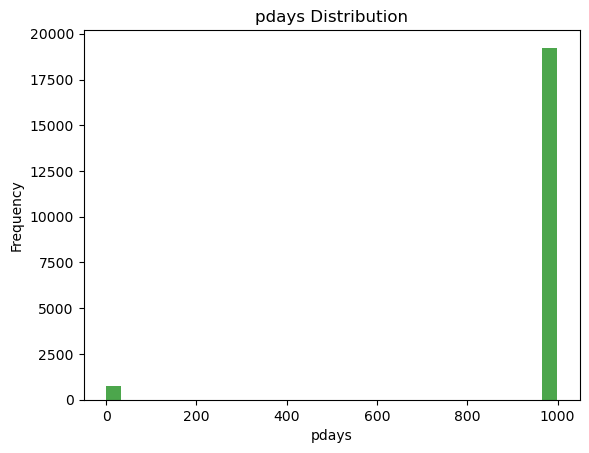

In [119]:
# Plot histogram of 'pdays' column
plt.hist(bank['pdays'], bins=30, color='green', alpha=0.7)
plt.title('pdays Distribution')
plt.xlabel('pdays')
plt.ylabel('Frequency')
plt.show()

In [120]:
# Calculate the count of each value in the 'campaign' column
campaign_counts = bank['campaign'].value_counts()

# Display the table of counts
print(campaign_counts)


campaign
1     8554
2     5038
3     2654
4     1305
5      810
6      475
7      287
8      195
9      151
10     104
11      89
12      64
13      45
14      33
17      30
16      24
15      19
20      15
18      15
21      14
23      12
22      10
24      10
19      10
29       5
30       5
27       5
26       3
25       3
43       2
32       2
34       2
28       2
33       2
56       1
40       1
41       1
31       1
39       1
35       1
Name: count, dtype: int64


In [121]:
# Define a function to categorize the number of contacts
def categorize_campaign(campaign):
    if campaign <= 5:
        return "high_active"
    elif campaign <= 10:
        return "moderate_active"
    else:
        return "less_active"

# Apply the function to each number of contacts
bank['campaign_group'] = bank['campaign'].apply(categorize_campaign)

# Summarize the counts for each group
campaign_group_counts = bank['campaign_group'].value_counts()

# Display the result
print(campaign_group_counts)


campaign_group
high_active        18361
moderate_active     1212
less_active          427
Name: count, dtype: int64


In [122]:
# Perform one-hot encoding on the 'campaign_group' column
one_hot_encoded = pd.get_dummies(bank['campaign_group'], prefix='campaign', dtype=int)

# Concatenate the original DataFrame with the one-hot encoded DataFrame
bank = pd.concat([bank, one_hot_encoded], axis=1)

# Drop the original 'campaign_group' column
bank.drop('campaign_group', axis=1, inplace=True)

# View the first few rows of the resulting DataFrame
bank.head()


,client_id,age,job,education,default,housing,loan,contact,month,campaign,...,season_off_season,season_peak_season,day_fri,day_mon,day_thu,day_tue,day_wed,campaign_high_active,campaign_less_active,campaign_moderate_active
0,29925,42,management,basic.9y,no,no,no,cellular,jul,1,...,0,1,0,0,1,0,0,1,0,0
1,37529,35,unemployed,university.degree,no,yes,no,telephone,jun,4,...,0,1,0,1,0,0,0,1,0,0
2,2757,44,technician,basic.9y,no,yes,yes,cellular,may,1,...,0,1,0,1,0,0,0,1,0,0
3,9642,45,services,high.school,no,yes,no,cellular,apr,1,...,0,0,0,0,0,1,0,1,0,0
4,14183,45,unknown,unknown,unknown,unknown,unknown,telephone,may,1,...,0,1,0,0,0,0,1,1,0,0


In [123]:
# Perform one-hot encoding for the 'poutcome' column
one_hot_encoded_poutcome = pd.get_dummies(bank['poutcome'], prefix='poutcome', dtype=int)

# Concatenate the original DataFrame with the one-hot encoded DataFrame
bank = pd.concat([bank, one_hot_encoded_poutcome], axis=1)

# Drop the original 'poutcome' column
bank.drop('poutcome', axis=1, inplace=True)

# View the first few rows of the resulting DataFrame
bank.head()

,client_id,age,job,education,default,housing,loan,contact,month,campaign,...,day_mon,day_thu,day_tue,day_wed,campaign_high_active,campaign_less_active,campaign_moderate_active,poutcome_failure,poutcome_nonexistent,poutcome_success
0,29925,42,management,basic.9y,no,no,no,cellular,jul,1,...,0,1,0,0,1,0,0,0,1,0
1,37529,35,unemployed,university.degree,no,yes,no,telephone,jun,4,...,1,0,0,0,1,0,0,0,1,0
2,2757,44,technician,basic.9y,no,yes,yes,cellular,may,1,...,1,0,0,0,1,0,0,0,1,0
3,9642,45,services,high.school,no,yes,no,cellular,apr,1,...,0,0,1,0,1,0,0,0,1,0
4,14183,45,unknown,unknown,unknown,unknown,unknown,telephone,may,1,...,0,0,0,1,1,0,0,0,1,0


count    20000.000000
mean         0.088100
std          1.573281
min         -3.400000
25%         -1.800000
50%          1.100000
75%          1.400000
max          1.400000
Name: emp.var.rate, dtype: float64


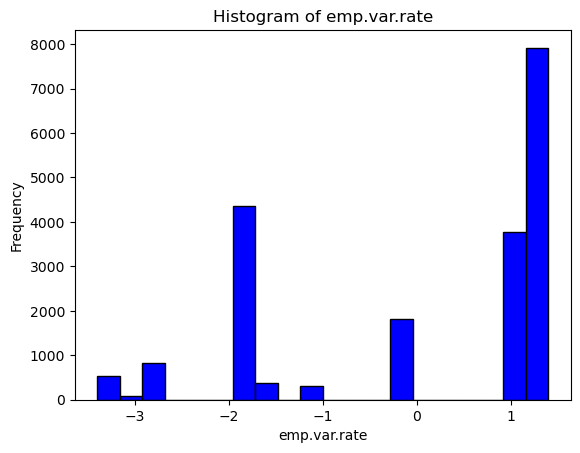

In [125]:
# Summary of emp.var.rate
print(bank['emp.var.rate'].describe())

# Histogram of emp.var.rate
plt.hist(bank['emp.var.rate'], bins=20, color='blue', edgecolor='black')
plt.title('Histogram of emp.var.rate')
plt.xlabel('emp.var.rate')
plt.ylabel('Frequency')
plt.show()

In [126]:
# Define the breaks for grouping
breaks = [-float('inf'), -1.8, 1, float('inf')]

# Create a new categorical variable based on emp.var.rate
bank['emp_var_rate_category'] = pd.cut(bank['emp.var.rate'], 
                                                       bins=breaks, 
                                                       labels=["emp_rate_negative", "emp_rate_neutral", "emp_rate_positive"])

# Check the distribution of the new variable
print(bank['emp_var_rate_category'].value_counts())

emp_var_rate_category
emp_rate_positive    11703
emp_rate_negative     5808
emp_rate_neutral      2489
Name: count, dtype: int64


In [127]:
# Create dummy variables for emp_var_rate_category
dummy_cols = pd.get_dummies(bank['emp_var_rate_category'], prefix='emp_rate', dtype=int, drop_first=False)

# Concatenate the original DataFrame with the dummy variables
bank = pd.concat([bank, dummy_cols], axis=1)

# View the first few rows of the resulting dataframe with dummy variables
bank.head()

,client_id,age,job,education,default,housing,loan,contact,month,campaign,...,campaign_high_active,campaign_less_active,campaign_moderate_active,poutcome_failure,poutcome_nonexistent,poutcome_success,emp_var_rate_category,emp_rate_emp_rate_negative,emp_rate_emp_rate_neutral,emp_rate_emp_rate_positive
0,29925,42,management,basic.9y,no,no,no,cellular,jul,1,...,1,0,0,0,1,0,emp_rate_positive,0,0,1
1,37529,35,unemployed,university.degree,no,yes,no,telephone,jun,4,...,1,0,0,0,1,0,emp_rate_positive,0,0,1
2,2757,44,technician,basic.9y,no,yes,yes,cellular,may,1,...,1,0,0,0,1,0,emp_rate_negative,1,0,0
3,9642,45,services,high.school,no,yes,no,cellular,apr,1,...,1,0,0,0,1,0,emp_rate_negative,1,0,0
4,14183,45,unknown,unknown,unknown,unknown,unknown,telephone,may,1,...,1,0,0,0,1,0,emp_rate_positive,0,0,1


In [128]:
# Calculate the difference between consecutive consumer price index values
bank['cons_price_idx_diff'] = bank['cons.price.idx'].diff()

# Convert the difference values to integers
bank['cons_price_idx_diff'] = bank['cons_price_idx_diff'].fillna(0).astype(int)

# Define the breaks and labels for grouping
bins = [-np.inf, -1, 1, np.inf]
labels = ['decrease', 'no_change', 'increase']

# Group the integer difference values into categories
bank['cons_price_idx_diff_group'] = pd.cut(bank['cons_price_idx_diff'], bins=bins, labels=labels)

# Print the first few rows to check
print(bank[['cons.price.idx', 'cons_price_idx_diff', 'cons_price_idx_diff_group']].head())


   cons.price.idx  cons_price_idx_diff cons_price_idx_diff_group
0          93.918                    0                 no_change
1          94.465                    0                 no_change
2          92.893                   -1                  decrease
3          93.075                    0                 no_change
4          93.994                    0                 no_change


In [129]:
# Create dummy variables for cons_price_idx_diff_group
bank = pd.get_dummies(bank, columns=['cons_price_idx_diff_group'], dtype=int, drop_first=False)

# View the first few rows of the resulting dataframe with dummy variables
bank.head()

,client_id,age,job,education,default,housing,loan,contact,month,campaign,...,poutcome_nonexistent,poutcome_success,emp_var_rate_category,emp_rate_emp_rate_negative,emp_rate_emp_rate_neutral,emp_rate_emp_rate_positive,cons_price_idx_diff,cons_price_idx_diff_group_decrease,cons_price_idx_diff_group_no_change,cons_price_idx_diff_group_increase
0,29925,42,management,basic.9y,no,no,no,cellular,jul,1,...,1,0,emp_rate_positive,0,0,1,0,0,1,0
1,37529,35,unemployed,university.degree,no,yes,no,telephone,jun,4,...,1,0,emp_rate_positive,0,0,1,0,0,1,0
2,2757,44,technician,basic.9y,no,yes,yes,cellular,may,1,...,1,0,emp_rate_negative,1,0,0,-1,1,0,0
3,9642,45,services,high.school,no,yes,no,cellular,apr,1,...,1,0,emp_rate_negative,1,0,0,0,0,1,0
4,14183,45,unknown,unknown,unknown,unknown,unknown,telephone,may,1,...,1,0,emp_rate_positive,0,0,1,0,0,1,0


In [130]:
# Calculate the difference between consecutive consumer confidence index values
bank['cons_conf_idx_diff'] = bank['cons.conf.idx'].diff()

# Convert the difference values to integers and replace NA with 0
bank['cons_conf_idx_diff'] = bank['cons_conf_idx_diff'].fillna(0).astype(int)

# Define the bins and labels for grouping
bins = [-np.inf, 0, np.inf]
labels = ['decrease', 'increase']

# Group the integer difference values into categories
bank['cons_conf_idx_diff_group'] = pd.cut(bank['cons_conf_idx_diff'], bins=bins, labels=labels, include_lowest=True, right=False)

# Print the first few rows to check
print(bank[['cons.conf.idx', 'cons_conf_idx_diff', 'cons_conf_idx_diff_group']].head())

   cons.conf.idx  cons_conf_idx_diff cons_conf_idx_diff_group
0          -42.7                   0                 increase
1          -41.8                   0                 increase
2          -46.2                  -4                 decrease
3          -47.1                   0                 increase
4          -36.4                  10                 increase


In [131]:
# Create dummy variables for cons_conf_idx_diff_group
dummy_cols = pd.get_dummies(bank['cons_conf_idx_diff_group'], dtype=int, prefix='cons_conf_idx_diff')

# Concatenate the original DataFrame with the dummy variables
bank = pd.concat([bank, dummy_cols], axis=1)

# View the first few rows of the resulting DataFrame
bank.head()

,client_id,age,job,education,default,housing,loan,contact,month,campaign,...,emp_rate_emp_rate_neutral,emp_rate_emp_rate_positive,cons_price_idx_diff,cons_price_idx_diff_group_decrease,cons_price_idx_diff_group_no_change,cons_price_idx_diff_group_increase,cons_conf_idx_diff,cons_conf_idx_diff_group,cons_conf_idx_diff_decrease,cons_conf_idx_diff_increase
0,29925,42,management,basic.9y,no,no,no,cellular,jul,1,...,0,1,0,0,1,0,0,increase,0,1
1,37529,35,unemployed,university.degree,no,yes,no,telephone,jun,4,...,0,1,0,0,1,0,0,increase,0,1
2,2757,44,technician,basic.9y,no,yes,yes,cellular,may,1,...,0,0,-1,1,0,0,-4,decrease,1,0
3,9642,45,services,high.school,no,yes,no,cellular,apr,1,...,0,0,0,0,1,0,0,increase,0,1
4,14183,45,unknown,unknown,unknown,unknown,unknown,telephone,may,1,...,0,1,0,0,1,0,10,increase,0,1


In [132]:
threshold = 3.0

# Create a new binary feature indicating whether euribor3m is above the threshold
bank['euribor3m_above_threshold'] = (bank['euribor3m'] > threshold).astype(int)

In [133]:
# Perform one-hot encoding for euribor3m_above_threshold column
bank = pd.get_dummies(bank, columns=['euribor3m_above_threshold'], dtype=int, prefix='euribor3m_threshold')

# View the first few rows of the resulting DataFrame
bank.head()

,client_id,age,job,education,default,housing,loan,contact,month,campaign,...,cons_price_idx_diff,cons_price_idx_diff_group_decrease,cons_price_idx_diff_group_no_change,cons_price_idx_diff_group_increase,cons_conf_idx_diff,cons_conf_idx_diff_group,cons_conf_idx_diff_decrease,cons_conf_idx_diff_increase,euribor3m_threshold_0,euribor3m_threshold_1
0,29925,42,management,basic.9y,no,no,no,cellular,jul,1,...,0,0,1,0,0,increase,0,1,0,1
1,37529,35,unemployed,university.degree,no,yes,no,telephone,jun,4,...,0,0,1,0,0,increase,0,1,0,1
2,2757,44,technician,basic.9y,no,yes,yes,cellular,may,1,...,-1,1,0,0,-4,decrease,1,0,1,0
3,9642,45,services,high.school,no,yes,no,cellular,apr,1,...,0,0,1,0,0,increase,0,1,1,0
4,14183,45,unknown,unknown,unknown,unknown,unknown,telephone,may,1,...,0,0,1,0,10,increase,0,1,0,1


In [134]:
# Define binning function
def bin_nr_employed(nr_employed):
    if nr_employed < 5000:
        return "low"
    elif 5000 <= nr_employed < 5100:
        return "medium"
    elif nr_employed >= 5100:
        return "high"
    else:
        return None

# Apply binning function to create new feature engineering column
bank['nr_employed_group'] = bank['nr.employed'].apply(bin_nr_employed)

# View the first few rows of the dataframe with the new feature engineering column
bank.head()

,client_id,age,job,education,default,housing,loan,contact,month,campaign,...,cons_price_idx_diff_group_decrease,cons_price_idx_diff_group_no_change,cons_price_idx_diff_group_increase,cons_conf_idx_diff,cons_conf_idx_diff_group,cons_conf_idx_diff_decrease,cons_conf_idx_diff_increase,euribor3m_threshold_0,euribor3m_threshold_1,nr_employed_group
0,29925,42,management,basic.9y,no,no,no,cellular,jul,1,...,0,1,0,0,increase,0,1,0,1,high
1,37529,35,unemployed,university.degree,no,yes,no,telephone,jun,4,...,0,1,0,0,increase,0,1,0,1,high
2,2757,44,technician,basic.9y,no,yes,yes,cellular,may,1,...,1,0,0,-4,decrease,1,0,1,0,medium
3,9642,45,services,high.school,no,yes,no,cellular,apr,1,...,0,1,0,0,increase,0,1,1,0,medium
4,14183,45,unknown,unknown,unknown,unknown,unknown,telephone,may,1,...,0,1,0,10,increase,0,1,0,1,high


In [135]:
# Convert 'nr_employed_group' to dummy variables
dummy_nr_employed_group = pd.get_dummies(bank['nr_employed_group'], dtype=int, prefix='nr_employed_group')

# Concatenate the dummy variables with the original dataframe
bank = pd.concat([bank, dummy_nr_employed_group], axis=1)

# View the first few rows of the resulting dataframe with dummy variables
bank.head()

,client_id,age,job,education,default,housing,loan,contact,month,campaign,...,cons_conf_idx_diff,cons_conf_idx_diff_group,cons_conf_idx_diff_decrease,cons_conf_idx_diff_increase,euribor3m_threshold_0,euribor3m_threshold_1,nr_employed_group,nr_employed_group_high,nr_employed_group_low,nr_employed_group_medium
0,29925,42,management,basic.9y,no,no,no,cellular,jul,1,...,0,increase,0,1,0,1,high,1,0,0
1,37529,35,unemployed,university.degree,no,yes,no,telephone,jun,4,...,0,increase,0,1,0,1,high,1,0,0
2,2757,44,technician,basic.9y,no,yes,yes,cellular,may,1,...,-4,decrease,1,0,1,0,medium,0,0,1
3,9642,45,services,high.school,no,yes,no,cellular,apr,1,...,0,increase,0,1,1,0,medium,0,0,1
4,14183,45,unknown,unknown,unknown,unknown,unknown,telephone,may,1,...,10,increase,0,1,0,1,high,1,0,0


In [138]:
# Define the columns to be dropped
columns_to_drop = ['age', 'job', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'emp_var_rate_category', 'cons_price_idx_diff',
       'cons_conf_idx_diff', 'cons_conf_idx_diff_group', 
       'euribor3m_threshold_1', 'nr_employed_group']

# Drop the specified columns
bank = bank.drop(columns=columns_to_drop)

# Check the structure of the updated dataframe
bank.head()

,client_id,subscribe,age_Early-adult,age_Midage-adult,age_Adult,age_late_middle_aged,age_senior,blue_collar_jobs,other_jobs,unknown_jobs,...,emp_rate_emp_rate_positive,cons_price_idx_diff_group_decrease,cons_price_idx_diff_group_no_change,cons_price_idx_diff_group_increase,cons_conf_idx_diff_decrease,cons_conf_idx_diff_increase,euribor3m_threshold_0,nr_employed_group_high,nr_employed_group_low,nr_employed_group_medium
0,29925,0,0,0,1,0,0,0,0,0,...,1,0,1,0,0,1,0,1,0,0
1,37529,0,0,1,0,0,0,0,1,0,...,1,0,1,0,0,1,0,1,0,0
2,2757,0,0,0,1,0,0,1,0,0,...,0,1,0,0,1,0,1,0,0,1
3,9642,0,0,0,1,0,0,0,1,0,...,0,0,1,0,0,1,1,0,0,1
4,14183,0,0,0,1,0,0,0,0,1,...,1,0,1,0,0,1,0,1,0,0


### Splitting Data set

In [139]:
np.random.seed(123)

# Define features (X) and target variable (y)
X = bank.drop(columns=['subscribe'])
y = bank['subscribe']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

# Display the shape of the training and testing sets
print("Training dataset shape:", X_train.shape)
print("Testing dataset shape:", X_test.shape)

Training dataset shape: (14000, 55)
Testing dataset shape: (6000, 55)


### Feature Selection

In [142]:
# Select top 20 features based on chi-squared test
selector = SelectKBest(score_func=chi2, k=20)
X_selected = selector.fit_transform(X_train, y_train)

# Fit a logistic regression model with the selected features
lr = LogisticRegression()
lr.fit(X_selected, y_train)

# Get the selected feature indices
selected_indices = selector.get_support(indices=True)

# Get the selected feature names
selected_features = X.columns[selected_indices]

# Get feature importance
feature_importance = lr.coef_[0]

# Print the selected feature names and their importance
for feature, importance in zip(selected_features, feature_importance):
    print(f"Feature: {feature}, Importance: {importance}")


Feature: client_id, Importance: 2.464881690902453e-06
Feature: age_Early-adult, Importance: -0.03595515003970614
Feature: age_senior, Importance: 0.0375830854519565
Feature: blue_collar_jobs, Importance: -0.27059109372602297
Feature: default_unknown, Importance: -0.1826311581336692
Feature: contact_cellular, Importance: -0.17161952413637518
Feature: contact_telephone, Importance: -0.3277019089139879
Feature: season_moderate, Importance: 0.0041008975209590685
Feature: season_off_season, Importance: 0.035158900144509654
Feature: season_peak_season, Importance: -0.5385812307158311
Feature: poutcome_nonexistent, Importance: -0.5704247665418044
Feature: poutcome_success, Importance: 0.1041344277844631
Feature: emp_rate_emp_rate_negative, Importance: 0.04920575093515609
Feature: emp_rate_emp_rate_neutral, Importance: -0.006478918065272847
Feature: emp_rate_emp_rate_positive, Importance: -0.5420482659202458
Feature: cons_price_idx_diff_group_decrease, Importance: -0.00891251085900851
Feature:

### Modelling

In [172]:
models = {
    'Gradient Boosting': GradientBoostingClassifier(),
    'Random Forest':RandomForestClassifier(),
    'Decision Trees': DecisionTreeClassifier(),
    'Neural Networks': MLPClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Ridge': RidgeClassifier(),
    'LogisticRegression':LogisticRegression()
}

In [152]:
# Initialize StandardScaler
scaler = StandardScaler()

# Fit scaler and transform selected features
X_selected_scaled = scaler.fit_transform(X_selected)

In [145]:
result = {}

In [179]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import numpy as np

results = {}

for name, model in models.items():
    # Fit model
    model.fit(X_selected_scaled, y_train)
    
    # Predict on training data
    y_pred_train = model.predict(X_selected_scaled)
    
    # Calculate metrics
    accuracy = accuracy_score(y_train, y_pred_train)
    precision = precision_score(y_train, y_pred_train, average='weighted')  # 'weighted' takes care of imbalance
    recall = recall_score(y_train, y_pred_train, average='weighted')  # 'weighted' takes care of imbalance
    f1 = f1_score(y_train, y_pred_train, average='weighted')  # 'weighted' takes care of imbalance
    conf_matrix = confusion_matrix(y_train, y_pred_train)
    
    # Store results
    results[name] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 Score': f1, 'Confusion Matrix': conf_matrix}

for name, metrics in results.items():
    print(f'{name}: Accuracy={metrics["Accuracy"]:.4f}, Precision={metrics["Precision"]:.4f}, Recall={metrics["Recall"]:.4f}, F1 Score={metrics["F1 Score"]:.4f}')
    print(f'Confusion Matrix:\n{metrics["Confusion Matrix"]}\n')


Gradient Boosting: Accuracy=0.9029, Precision=0.8885, Recall=0.9029, F1 Score=0.8791
Confusion Matrix:
[[12289   133]
 [ 1227   351]]

Decision Trees: Accuracy=1.0000, Precision=1.0000, Recall=1.0000, F1 Score=1.0000
Confusion Matrix:
[[12422     0]
 [    0  1578]]

Neural Networks: Accuracy=0.9041, Precision=0.8891, Recall=0.9041, F1 Score=0.8842
Confusion Matrix:
[[12244   178]
 [ 1164   414]]

K-Nearest Neighbors: Accuracy=0.9095, Precision=0.8969, Recall=0.9095, F1 Score=0.8947
Confusion Matrix:
[[12206   216]
 [ 1051   527]]

Ridge: Accuracy=0.8984, Precision=0.8792, Recall=0.8984, F1 Score=0.8738
Confusion Matrix:
[[12256   166]
 [ 1256   322]]

LogisticRegression: Accuracy=0.8992, Precision=0.8811, Recall=0.8992, F1 Score=0.8740
Confusion Matrix:
[[12272   150]
 [ 1261   317]]



In [150]:
t_results = {}

In [181]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import numpy as np

results = {}

for name, model in models.items():
    # Fit model
    model.fit(X_train, y_train)
    
    # Predict on test data
    y_pred_test = model.predict(X_test)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred_test)
    precision = precision_score(y_test, y_pred_test, average='weighted')  # 'weighted' takes care of imbalance
    recall = recall_score(y_test, y_pred_test, average='weighted')  # 'weighted' takes care of imbalance
    f1 = f1_score(y_test, y_pred_test, average='weighted')  # 'weighted' takes care of imbalance
    conf_matrix = confusion_matrix(y_test, y_pred_test)
    
    # Store results
    results[name] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 Score': f1, 'Confusion Matrix': conf_matrix}

for name, metrics in results.items():
    print(f'{name}: Accuracy={metrics["Accuracy"]:.4f}, Precision={metrics["Precision"]:.4f}, Recall={metrics["Recall"]:.4f}, F1 Score={metrics["F1 Score"]:.4f}')
    print(f'Confusion Matrix:\n{metrics["Confusion Matrix"]}\n')


Gradient Boosting: Accuracy=0.8982, Precision=0.8811, Recall=0.8982, F1 Score=0.8735
Confusion Matrix:
[[5241   66]
 [ 545  148]]

Decision Trees: Accuracy=0.8203, Precision=0.8357, Recall=0.8203, F1 Score=0.8276
Confusion Matrix:
[[4696  611]
 [ 467  226]]

Neural Networks: Accuracy=0.3918, Precision=0.8579, Recall=0.3918, F1 Score=0.4615
Confusion Matrix:
[[1748 3559]
 [  90  603]]

K-Nearest Neighbors: Accuracy=0.8763, Precision=0.7881, Recall=0.8763, F1 Score=0.8271
Confusion Matrix:
[[5255   52]
 [ 690    3]]

Ridge: Accuracy=0.8972, Precision=0.8791, Recall=0.8972, F1 Score=0.8719
Confusion Matrix:
[[5240   67]
 [ 550  143]]

LogisticRegression: Accuracy=0.8845, Precision=0.7823, Recall=0.8845, F1 Score=0.8303
Confusion Matrix:
[[5307    0]
 [ 693    0]]



C:\Users\bmurugesan1\.conda\envs\py\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Cross Validation

In [178]:
from sklearn.model_selection import cross_val_score, KFold

# Define the number of folds for cross-validation
num_folds = 10

# Initialize KFold cross-validation splitter
kf = KFold(n_splits=num_folds, shuffle=True, random_state=100)

# Perform cross-validation for each model
for model_name, model in models.items():
    print(f"Cross-validation scores for {model_name}:")
    # Perform cross-validation
    cv_scores = cross_val_score(model, X_train[selected_features], y_train, cv=kf, scoring='accuracy')
    # Print the cross-validation scores
    print(cv_scores)
    # Calculate and print the mean and standard deviation of the cross-validation scores
    print(f"Mean accuracy: {cv_scores.mean():.4f}  Standard deviation: {cv_scores.std():.4f}")
    print("\n")

Cross-validation scores for Gradient Boosting:
[0.90928571 0.89928571 0.90714286 0.89642857 0.90285714 0.89928571
 0.88285714 0.89714286 0.895      0.89928571]
Mean accuracy: 0.8989  Standard deviation: 0.0069


Cross-validation scores for Decision Trees:
[0.83642857 0.83928571 0.82928571 0.83428571 0.83428571 0.84714286
 0.83071429 0.84285714 0.84285714 0.83071429]
Mean accuracy: 0.8368  Standard deviation: 0.0057


Cross-validation scores for Neural Networks:
[0.89642857 0.88571429 0.85428571 0.88571429 0.87857143 0.88785714
 0.86071429 0.88642857 0.88571429 0.65571429]
Mean accuracy: 0.8577  Standard deviation: 0.0684


Cross-validation scores for K-Nearest Neighbors:
[0.88714286 0.88142857 0.88214286 0.87428571 0.87571429 0.87785714
 0.85857143 0.88071429 0.87428571 0.87857143]
Mean accuracy: 0.8771  Standard deviation: 0.0072


Cross-validation scores for Ridge:
[0.90928571 0.89857143 0.90928571 0.89571429 0.89928571 0.89714286
 0.88357143 0.89714286 0.89571429 0.89785714]
Mean ac

In [182]:
bank.columns

Index(['client_id', 'subscribe', 'age_Early-adult', 'age_Midage-adult',
       'age_Adult', 'age_late_middle_aged', 'age_senior', 'blue_collar_jobs',
       'other_jobs', 'unknown_jobs', 'white_collar_jobs', 'divorced_marital',
       'married_marital', 'single_marital', 'unknown_marital',
       'basic_education', 'other_education', 'secondary_education',
       'tertiary_education', 'default_no', 'default_unknown', 'default_yes',
       'housing_no', 'housing_unknown', 'housing_yes', 'loan_no',
       'loan_unknown', 'loan_yes', 'contact_cellular', 'contact_telephone',
       'season_moderate', 'season_off_season', 'season_peak_season', 'day_fri',
       'day_mon', 'day_thu', 'day_tue', 'day_wed', 'campaign_high_active',
       'campaign_less_active', 'campaign_moderate_active', 'poutcome_failure',
       'poutcome_nonexistent', 'poutcome_success',
       'emp_rate_emp_rate_negative', 'emp_rate_emp_rate_neutral',
       'emp_rate_emp_rate_positive', 'cons_price_idx_diff_group_decreas

In [185]:
# saving to a CSV file
save_path = "bank.csv"
bank.to_csv(save_path, index=False)